# Validate new compendia

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import pandas as pd
import plotnine as pn
import seaborn as sns
from textwrap import fill
import matplotlib.pyplot as plt
import utils

/home/alexandra/anaconda3/envs/make_compendia/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# User param
# Threshold: if median accessory expression of PAO1 samples > threshold then this sample is binned as PAO1
threshold = 25

In [3]:
# Save PAO1 and PA14 compendia with SRA labels to file
pao1_compendium_SRA_filename = "pao1_compendium_sra_label.tsv"
pa14_compendium_SRA_filename = "pa14_compendium_sra_label.tsv"

# Save PAO1 and PA14 compendia without SRA labels to file
pao1_compendium_filename = "pao1_compendium.tsv"
pa14_compendium_filename = "pa14_compendium.tsv"

# Save prebinned data
# All samples mapped to the PAO1 and PA14 references
pao1_prebinned_compendium_filename = "pao1_prebinned_compendium.tsv"
pa14_prebinned_compendium_filename = "pa14_prebinned_compendium.tsv"

In [4]:
# Load data
pao1_expression = pd.read_csv(pao1_compendium_SRA_filename, sep="\t", index_col=0, header=0)
pa14_expression = pd.read_csv(pa14_compendium_SRA_filename, sep="\t", index_col=0, header=0)

pao1_expression_prebin = pd.read_csv(
    pao1_prebinned_compendium_filename, sep="\t", index_col=0, header=0
)
pa14_expression_prebin = pd.read_csv(
    pa14_prebinned_compendium_filename, sep="\t", index_col=0, header=0
)

## Get core and accessory annotations

In [5]:
# Downloaded from the BACTOME website
# These files contain PAO1 gene ids and their homologous PA14 id and vice versa
# These homologous mappings are what we used to define what are core and accessory genes
pao1_annot_filename = "PAO1_ID_2_PA14_ID_PAO1ref.csv" 
pa14_annot_filename = "PA14_ID_2_PAO1_ID_PA14ref.csv"

core_acc_dict = utils.get_my_core_acc_genes(
    pao1_annot_filename, pa14_annot_filename, pao1_expression, pa14_expression
)

Number of PAO1 core genes: 5366
Number of PA14 core genes: 5363
Number of PAO1 core genes in my dataset: 5361
Number of PA14 core genes in my dataset: 5361
Number of PAO1-specific genes: 203
Number of PA14-specific genes: 531


In [6]:
pao1_core = core_acc_dict["core_pao1"]
pa14_core = core_acc_dict["core_pa14"]
pao1_acc = core_acc_dict["acc_pao1"]
pa14_acc = core_acc_dict["acc_pa14"]

## Format data examining accessory genome

In [7]:
# Create accessory df for PAO1 compendium
# accessory gene ids | median accessory expression | strain label

# PAO1-only genes in PAO1 compendium
pao1_acc_pao1_compendium = pao1_expression[pao1_acc]
pao1_acc_pao1_compendium["median acc expression"] = pao1_acc_pao1_compendium.median(
    axis=1
)

# PA14-only genes in PAO1 compendium
pa14_acc_numeric = pa14_acc.copy()
pa14_acc_numeric.remove("Strain type")
pao1_binned_sample_ids = list(pao1_expression.index)
pa14_acc_pao1_compendium = pa14_expression_prebin.loc[
    pao1_binned_sample_ids, pa14_acc_numeric
]
pa14_acc_pao1_compendium["median acc expression"] = pa14_acc_pao1_compendium.median(
    axis=1
)

pao1_acc_pao1_compendium.head()

/home/alexandra/anaconda3/envs/make_compendia/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,PA1392,PA2102,PA3511,PA4638,PA2976,PA5086,PA3508,PA3152,PA3065,PA1560,...,PA4028,PA3497,PA2073,PA3151,PA2853,PA2227,PA0457.1,PA2334,PA3514,median acc expression
ERX541571,122.115846,57.319683,9.968640,358.871057,22409.503756,94.702084,32.398081,261.676812,84.733444,114.639365,...,9.968640,117.131525,19.937281,333.949455,81929.763787,448.588821,87.225604,191.896329,52.335362,89.717764
ERX541572,109.661502,74.569821,4.386460,365.538339,15412.558525,106.737195,21.932300,286.582058,51.175367,115.510115,...,4.386460,89.191355,17.545840,419.638013,84506.615359,359.689726,70.183361,184.231323,29.243067,87.729201
ERX541573,175.931293,84.026886,3.938760,203.502615,7486.270398,131.292010,30.197162,171.992533,57.768484,70.897685,...,3.938760,65.646005,27.571322,446.392833,65575.107205,207.441375,153.611651,99.781927,18.380881,91.247947
ERX541574,210.816054,122.177486,9.582548,297.058985,10061.675288,179.672773,23.956370,258.728793,74.264746,74.264746,...,9.582548,91.034205,21.560733,606.096154,49575.311527,354.554272,86.242931,107.803664,35.934555,104.210208
ERX541575,186.334292,103.954921,7.845654,217.716910,7017.937870,129.453298,17.652722,268.713664,31.382618,66.688062,...,0.000000,90.225026,25.498377,645.305075,70202.915666,284.404972,194.179947,41.189686,13.729895,82.379371


In [8]:
pa14_acc_pao1_compendium.head()

,PA14_15610,PA14_28980,PA14_13960,PA14_60040,PA14_51200,PA14_67210,PA14_49990,PA14_22230,PA14_48500,PA14_30970,...,PA14_25410,PA14_20530,PA14_59390,PA14_35920,PA14_22510,PA14_35980,PA14_51580,PA14_01220,PA14_35930,median acc expression
ERX541571,2.676603,0.000000,5.353206,0.000000,37.472440,0.000000,157.919568,8.029809,0.000000,2.676603,...,82.974688,0.0,0.0,10.706411,0.000000,0.000000,58.885263,0.000000,0.0,0.000000
ERX541572,0.000000,6.076176,0.000000,18.228527,48.609406,0.000000,112.409252,0.000000,0.000000,6.076176,...,42.533231,0.0,0.0,9.114264,6.076176,0.000000,15.190439,15.190439,0.0,3.038088
ERX541573,1.401125,0.000000,5.604498,0.000000,57.446106,0.000000,166.733818,7.005623,2.802249,1.401125,...,57.446106,0.0,0.0,5.604498,0.000000,0.000000,54.643856,0.000000,0.0,1.401125
ERX541574,2.455491,0.000000,2.455491,0.000000,55.248554,3.683237,79.803467,1.227746,3.683237,0.000000,...,19.643930,0.0,0.0,0.000000,0.000000,0.000000,47.882080,0.000000,0.0,1.227746
ERX541575,4.216974,0.000000,25.301842,0.000000,78.014014,0.000000,149.702567,0.000000,4.216974,0.000000,...,25.301842,0.0,0.0,4.216974,0.000000,2.108487,63.254606,2.108487,0.0,2.108487


In [9]:
# Merge PAO1 and PA14 accessory dataframes
pao1_pa14_acc_pao1_compendium_label = pao1_acc_pao1_compendium.merge(
    pa14_acc_pao1_compendium,
    left_index=True,
    right_index=True,
    suffixes=["_pao1", "_pa14"],
)

pao1_pa14_acc_pao1_compendium_label.head()

,PA1392,PA2102,PA3511,PA4638,PA2976,PA5086,PA3508,PA3152,PA3065,PA1560,...,PA14_25410,PA14_20530,PA14_59390,PA14_35920,PA14_22510,PA14_35980,PA14_51580,PA14_01220,PA14_35930,median acc expression_pa14
ERX541571,122.115846,57.319683,9.968640,358.871057,22409.503756,94.702084,32.398081,261.676812,84.733444,114.639365,...,82.974688,0.0,0.0,10.706411,0.000000,0.000000,58.885263,0.000000,0.0,0.000000
ERX541572,109.661502,74.569821,4.386460,365.538339,15412.558525,106.737195,21.932300,286.582058,51.175367,115.510115,...,42.533231,0.0,0.0,9.114264,6.076176,0.000000,15.190439,15.190439,0.0,3.038088
ERX541573,175.931293,84.026886,3.938760,203.502615,7486.270398,131.292010,30.197162,171.992533,57.768484,70.897685,...,57.446106,0.0,0.0,5.604498,0.000000,0.000000,54.643856,0.000000,0.0,1.401125
ERX541574,210.816054,122.177486,9.582548,297.058985,10061.675288,179.672773,23.956370,258.728793,74.264746,74.264746,...,19.643930,0.0,0.0,0.000000,0.000000,0.000000,47.882080,0.000000,0.0,1.227746
ERX541575,186.334292,103.954921,7.845654,217.716910,7017.937870,129.453298,17.652722,268.713664,31.382618,66.688062,...,25.301842,0.0,0.0,4.216974,0.000000,2.108487,63.254606,2.108487,0.0,2.108487


In [10]:
# Create accessory df for PA14 compendium
# accessory gene ids | median accessory expression | strain label

# PA14-only genes in PA14 compendium
pa14_acc_pa14_compendium = pa14_expression[pa14_acc]
pa14_acc_pa14_compendium["median acc expression"] = pa14_acc_pa14_compendium.median(
    axis=1
)

# PAO1-only genes in PA14 compendium
pao1_acc_numeric = pao1_acc.copy()
pao1_acc_numeric.remove("Strain type")
pa14_binned_sample_ids = list(pa14_expression.index)
pao1_acc_pa14_compendium = pao1_expression_prebin.loc[
    pa14_binned_sample_ids, pao1_acc_numeric
]
pao1_acc_pa14_compendium["median acc expression"] = pao1_acc_pa14_compendium.median(
    axis=1
)

pa14_acc_pa14_compendium.head()

/home/alexandra/anaconda3/envs/make_compendia/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,PA14_15610,PA14_28980,PA14_13960,PA14_60040,PA14_51200,PA14_67210,PA14_49990,PA14_22230,PA14_48500,PA14_30970,...,PA14_25410,PA14_20530,PA14_59390,PA14_35920,PA14_22510,PA14_35980,PA14_51580,PA14_01220,PA14_35930,median acc expression
ERX1477379,2623.146776,12.644441,114.949464,232.197918,162.078745,568.999848,532.216020,168.975713,85.062604,337.951425,...,32.185850,427.612007,8183.252365,372.436264,29.886861,2.298989,11.494946,213.806004,10.345452,133.341379
ERX1477380,2187.318130,31.782149,68.508188,108.059307,145.491616,305.108632,512.752006,64.976838,58.620408,198.461865,...,26.838259,188.574085,2842.736672,346.778560,26.131989,2.825080,9.887780,203.405754,7.062700,114.415737
ERX1477381,1861.374178,46.634285,61.290775,85.274121,106.592652,232.505221,536.960482,58.625958,59.292162,165.218610,...,35.975020,159.888977,2092.546991,257.820976,16.655102,6.662041,13.990286,175.211671,10.659265,101.263019
ERX2174773,1531.752146,6.657648,4.931591,61.644887,45.617216,54.494080,950.564154,1.972636,105.289467,89.508376,...,25.397693,35.507455,487.241185,35.014296,7.397386,0.000000,3.698693,86.302841,0.493159,37.973250
ERX2174774,1674.270321,5.498425,8.522558,51.410271,42.337870,56.633774,1114.805608,0.549842,90.174165,104.744991,...,24.742911,35.464839,500.631569,35.739761,5.223503,1.374606,5.773346,92.373535,1.099685,40.413422


In [11]:
pao1_acc_pa14_compendium.head()

,PA1392,PA2102,PA3511,PA4638,PA2976,PA5086,PA3508,PA3152,PA3065,PA1560,...,PA4028,PA3497,PA2073,PA3151,PA2853,PA2227,PA0457.1,PA2334,PA3514,median acc expression
ERX1477379,0.0,0.0,0.0,367.793036,1684.766236,657.915493,0.0,0.0,0.0,87.950509,...,0.000000,0.0,0.0,0.0,644110.689604,0.0,0.000000,0.0,0.0,0.0
ERX1477380,0.0,0.0,0.0,315.774868,1542.384798,424.541767,0.0,0.0,0.0,125.608225,...,4.912053,0.0,0.0,0.0,340081.111803,0.0,0.701722,0.0,0.0,0.0
ERX1477381,0.0,0.0,0.0,243.135215,1474.090281,301.593956,0.0,0.0,0.0,101.638492,...,5.978735,0.0,0.0,0.0,312223.481733,0.0,4.650127,0.0,0.0,0.0
ERX2174773,0.0,0.0,0.0,24.007726,8879.857681,69.272293,0.0,0.0,0.0,791.754799,...,1.750563,0.0,0.0,0.0,36084.362527,0.0,0.000000,0.0,0.0,0.0
ERX2174774,0.0,0.0,0.0,23.173790,9691.111585,56.678065,0.0,0.0,0.0,817.504313,...,0.837607,0.0,0.0,0.0,33463.790810,0.0,0.000000,0.0,0.0,0.0


In [12]:
# Merge PAO1 and PA14 accessory dataframes
pao1_pa14_acc_pa14_compendium_label = pa14_acc_pa14_compendium.merge(
    pao1_acc_pa14_compendium,
    left_index=True,
    right_index=True,
    suffixes=["_pa14", "_pao1"],
)

pao1_pa14_acc_pa14_compendium_label.head()

,PA14_15610,PA14_28980,PA14_13960,PA14_60040,PA14_51200,PA14_67210,PA14_49990,PA14_22230,PA14_48500,PA14_30970,...,PA4028,PA3497,PA2073,PA3151,PA2853,PA2227,PA0457.1,PA2334,PA3514,median acc expression_pao1
ERX1477379,2623.146776,12.644441,114.949464,232.197918,162.078745,568.999848,532.216020,168.975713,85.062604,337.951425,...,0.000000,0.0,0.0,0.0,644110.689604,0.0,0.000000,0.0,0.0,0.0
ERX1477380,2187.318130,31.782149,68.508188,108.059307,145.491616,305.108632,512.752006,64.976838,58.620408,198.461865,...,4.912053,0.0,0.0,0.0,340081.111803,0.0,0.701722,0.0,0.0,0.0
ERX1477381,1861.374178,46.634285,61.290775,85.274121,106.592652,232.505221,536.960482,58.625958,59.292162,165.218610,...,5.978735,0.0,0.0,0.0,312223.481733,0.0,4.650127,0.0,0.0,0.0
ERX2174773,1531.752146,6.657648,4.931591,61.644887,45.617216,54.494080,950.564154,1.972636,105.289467,89.508376,...,1.750563,0.0,0.0,0.0,36084.362527,0.0,0.000000,0.0,0.0,0.0
ERX2174774,1674.270321,5.498425,8.522558,51.410271,42.337870,56.633774,1114.805608,0.549842,90.174165,104.744991,...,0.837607,0.0,0.0,0.0,33463.790810,0.0,0.000000,0.0,0.0,0.0


In [13]:
"Strain type" in pao1_pa14_acc_pa14_compendium_label.columns

True

## Accessory plots

In [14]:
pao1_pa14_acc_pao1_compendium_label[
    "Strain type"
] = pao1_pa14_acc_pao1_compendium_label["Strain type"].fillna("NA")
pao1_pa14_acc_pa14_compendium_label[
    "Strain type"
] = pao1_pa14_acc_pa14_compendium_label["Strain type"].fillna("NA")

/home/alexandra/anaconda3/envs/make_compendia/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


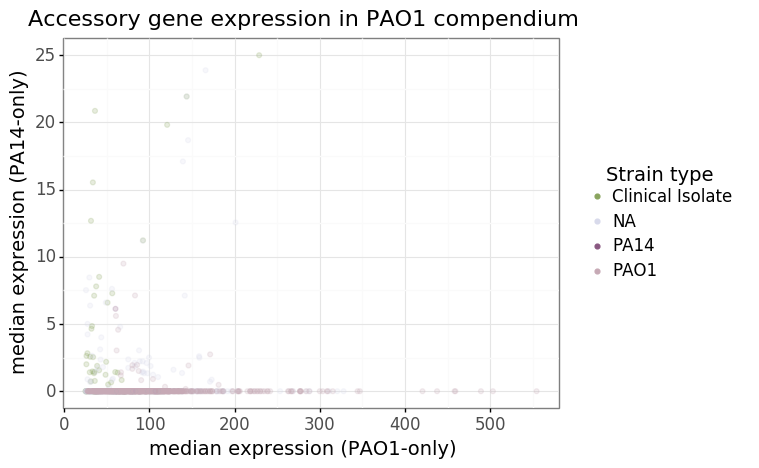

<ggplot: (8743513287289)>


/home/alexandra/anaconda3/envs/make_compendia/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/alexandra/anaconda3/envs/make_compendia/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: pao1_compendium.svg
  warn('Filename: {}'.format(filename))
/home/alexandra/anaconda3/envs/make_compendia/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [15]:
# Plot accessory gene expression in PAO1 compendium
# Note: commented out code is for plotting figure for Georgia's manuscript
colors = {
    "Clinical Isolate": "#89A45E",
    "PA14": "#895881",
    "PAK": "#EF8B46",
    "PAO1": "#C6A9B5",
    "NA": "#D8DAEB",
}
fig1 = pn.ggplot(
    pao1_pa14_acc_pao1_compendium_label,
    pn.aes(x="median acc expression_pao1", y="median acc expression_pa14"),
)
fig1 += pn.scale_color_manual(values=colors)
fig1 += pn.geom_point(pn.aes(color="Strain type"), alpha=0.2)
fig1 += pn.labs(
    x="median expression (PAO1-only)",
    y="median expression (PA14-only)",
    title="Accessory gene expression in PAO1 compendium",
)
fig1 += pn.theme_bw()
fig1 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=14),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=16),
    axis_text=pn.element_text(family="sans-serif", size=12),
    axis_title=pn.element_text(family="sans-serif", size=14),
)
fig1 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig1)

fig1.save(filename="pao1_compendium.svg", format="svg", dpi=300)

/home/alexandra/anaconda3/envs/make_compendia/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


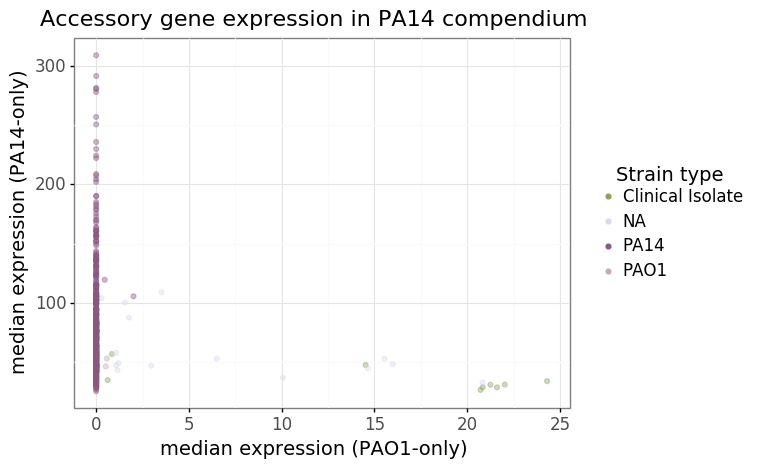

<ggplot: (8743513058957)>


/home/alexandra/anaconda3/envs/make_compendia/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/alexandra/anaconda3/envs/make_compendia/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: pa14_compendium.svg
  warn('Filename: {}'.format(filename))
/home/alexandra/anaconda3/envs/make_compendia/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [16]:
# Plot accessory gene expression in PA14 compendium
fig2 = pn.ggplot(
    pao1_pa14_acc_pa14_compendium_label,
    pn.aes(x="median acc expression_pao1", y="median acc expression_pa14"),
)
fig2 += pn.scale_color_manual(values=colors)
fig2 += pn.geom_point(pn.aes(color="Strain type"), alpha=0.4)
fig2 += pn.labs(
    x="median expression (PAO1-only)",
    y="median expression (PA14-only)",
    title="Accessory gene expression in PA14 compendium",
)
fig2 += pn.theme_bw()
fig2 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=14),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=16),
    axis_text=pn.element_text(family="sans-serif", size=12),
    axis_title=pn.element_text(family="sans-serif", size=14),
)
fig2 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig2)

fig2.save(filename="pa14_compendium.svg", format="svg", dpi=300)

These plots are showing the median expression of PAO1 genes (PAO1 accessory genes) on the x-axis and the median expression of PA14-only genes (PA14 accessory genes) on the y-axis.
Each point is a sample.

If we binned our samples accurately then for samples within our binned PAO1 compendium, we expect that samples will align along the PAO1-only axis. Similarly, for samples within our binned PA14 compendium, we expect that samples will align along the PA14-axis.

## Check

What is the distribution of median accessory gene expression look like for PAO1 binned but non-PAO1 SRA labeled samples compared to PAO1 binned and PAO1 SRA labeled samples? Looks like the non-PAO1 labeled samples may be clustered at the bottom of the distribution. Similarly for PA14 binned samples.

In [17]:
# Get PAO1 samples that are labeled PAO1 and non-PAO1
pao1_binned_pao1_sra = pao1_pa14_acc_pao1_compendium_label.loc[
    pao1_pa14_acc_pao1_compendium_label["Strain type"] == "PAO1",
    "median acc expression_pao1",
]

pao1_binned_non_pao1_sra = pao1_pa14_acc_pao1_compendium_label.loc[
    pao1_pa14_acc_pao1_compendium_label["Strain type"] != "PAO1",
    "median acc expression_pao1",
]

/home/alexandra/anaconda3/envs/make_compendia/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


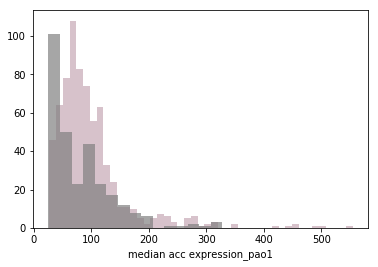

In [18]:
f = sns.distplot(
    pao1_binned_pao1_sra, color="#C6A9B5", kde=False, hist_kws={"alpha": 0.7}
)
f = sns.distplot(
    pao1_binned_non_pao1_sra, color="grey", kde=False, hist_kws={"alpha": 0.7}
)
if threshold == 0:
    plt.axvline(25, 0, 100, color="red")

In [19]:
# Get PA14 samples that are labeled PA14 and non-PA14
pa14_binned_pa14_sra = pao1_pa14_acc_pa14_compendium_label.loc[
    pao1_pa14_acc_pa14_compendium_label["Strain type"] == "PA14",
    "median acc expression_pa14",
]

pa14_binned_non_pa14_sra = pao1_pa14_acc_pa14_compendium_label.loc[
    pao1_pa14_acc_pa14_compendium_label["Strain type"] != "PA14",
    "median acc expression_pa14",
]

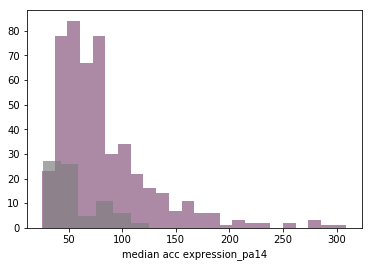

In [20]:
g = sns.distplot(
    pa14_binned_pa14_sra, color="#895881", kde=False, hist_kws={"alpha": 0.7}
)
g = sns.distplot(
    pa14_binned_non_pa14_sra, color="grey", kde=False, hist_kws={"alpha": 0.7}
)
if threshold == 0:
    plt.axvline(25, 0, 100, color="red")